# Project: Movie database analysis

# Table of Contents

•Introduction

•Setup 

•Questions for Investigation  

•Data Wrangling

•Exploratory Data Analysis

•Conclusions

•Limitations

# Introduction

I Chose this this database as I love watching movies and I wanted to explore some intersting facts on the movie business like revenues and budget of the movies and how profitable is the movie business in general. Its a big database with lots of movies over the years and I hope I get the answer of few questions that I already have in my mind as I select this project.

# Setup

In [1]:
# Importing all the libraries that are used in the project

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import calendar
%matplotlib inline

In [2]:
# Load the data and print out a few lines. 

tmdb_df = pd.read_csv("tmdb-movies.csv")
tmdb_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


# Questions for Investigation

In [3]:
##############  Questions that comes to mind after seeing the data set are as follows : ##############################
######################################################################################################################

# What is the correlation between various attributes of the movie database and What are the various factors that have correlation with popularity

# Analyze the Budget and Revenue earned by the movie business over the years 

# Which Years have released the Maximum movies and what are the Top5 years that have maximum release

# Are there any months where Movie release is high

# What are the genres for which Maximum movies are released

# What are the years where the most popular genres are produced

# Does older movies have online precense (homepage)

# Check the Vote Average distribution Check what are the most common ratings

# Data Wrangling

In [4]:
#To check the general statistics of the data 
tmdb_df.describe()
#Observations : 
# Average budget of the movie is : 1.086600e+04 while max budget goes uptill 4.250000e+08
# Upto 75% of the movie generate a revenue of 2.400000e+07 and budget as 1.500000e+07
# Average Run Time of the movie is 102 minutes while 75% of the movies run time is 111 minutes

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Check the Data types and attributes available for the dataset 
tmdb_df.info()
# Quick Observation:
# imdb_id, cast,homepage,director, tagline, keywords,overview, genres, production_companies have some missing data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Observations On Data Wrangling : 

In [6]:
# Below are the things which are used for cleaning Movie dataset : 

# Make a copy of original datraframe so that the original database stays entact.
# imdb_id and id both looks similar columns to identify a particular movie so may be need just one of these columns 
#There are few columns which I will not use for my investigation and can be removed eg :  original_title, tagline,keywords, overview, production_companies, budget_adj , revenue_adj
# release_date is a string object and needs to be converted to DateTime Object
# Genres and Cast have too many options so may be we can pick the first item as primary and eliminate others as keeping all of them and having a separate row for each will make too many entries for the same movie
# Budget and Revenue can be converted from scientific notation for quick interpretation.
# Check if there are any Duplicate rows if yes remove them

In [7]:
# Make a copy of database so that the orginal data remains entact
df_clean = tmdb_df.copy()
df_clean.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [8]:
# Dropping the Columns that I will not use in my investigation
df_clean = df_clean.drop(["imdb_id","original_title","tagline","keywords","overview","production_companies","budget_adj" ,"revenue_adj"], axis = 1)

In [9]:
df_clean.head(2)

,id,popularity,budget,revenue,cast,homepage,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [10]:
#Genres and Cast have too many options so may be we can pick the first item as primary and eliminate others as keeping all of
#them and having a separate row for each will make too many entries for the same movie

In [11]:
# Splitting the Cast column by "|" and taking the first name as the primary cast
# Splitting the genres column by "|" and taking the first name as the primary genres

cast_split = df_clean["cast"].str.split("|", n = 1, expand = True)
df_clean["Primary_Cast"]= cast_split[0]
genres_split = df_clean["genres"].str.split("|", n=1, expand = True)
df_clean["Primary_genres"]=genres_split[0]

In [12]:
#Dropping the original cast and genres column  and check that the new columns primary cast, primary genres are added
df_clean=df_clean.drop(["cast","genres"], axis = 1) 
df_clean.head(2)

,id,popularity,budget,revenue,homepage,director,runtime,release_date,vote_count,vote_average,release_year,Primary_Cast,Primary_genres
0,135397,32.985763,150000000,1513528810,http://www.jurassicworld.com/,Colin Trevorrow,124,6/9/15,5562,6.5,2015,Chris Pratt,Action
1,76341,28.419936,150000000,378436354,http://www.madmaxmovie.com/,George Miller,120,5/13/15,6185,7.1,2015,Tom Hardy,Action


In [13]:
# Converting "release date " to DateTime Format and extracting "release_month" from it. Also check if the new column is added
df_clean["release_date"] = pd.to_datetime(df_clean["release_date"])
df_clean['release_month']=df_clean["release_date"].dt.month
df_clean['release_month'] = df_clean['release_month'].apply(lambda x: calendar.month_abbr[x])
df_clean.head()

,id,popularity,budget,revenue,homepage,director,runtime,release_date,vote_count,vote_average,release_year,Primary_Cast,Primary_genres,release_month
0,135397,32.985763,150000000,1513528810,http://www.jurassicworld.com/,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,Chris Pratt,Action,Jun
1,76341,28.419936,150000000,378436354,http://www.madmaxmovie.com/,George Miller,120,2015-05-13,6185,7.1,2015,Tom Hardy,Action,May
2,262500,13.112507,110000000,295238201,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,Shailene Woodley,Adventure,Mar
3,140607,11.173104,200000000,2068178225,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,2015-12-15,5292,7.5,2015,Harrison Ford,Action,Dec
4,168259,9.335014,190000000,1506249360,http://www.furious7.com/,James Wan,137,2015-04-01,2947,7.3,2015,Vin Diesel,Action,Apr


In [14]:
# Check if there are any duplicate rows
df_clean.duplicated().sum()


1

In [15]:
# Remove the duplicate row and see if the duplicate row is removed
df_clean = df_clean.drop_duplicates()
df_clean.duplicated().sum()

0

In [16]:
# Check the data type of release_date and check that the no. of rows in the dataframe has reduced by one as the duplicate row is 
#removed
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
homepage          2936 non-null object
director          10821 non-null object
runtime           10865 non-null int64
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
Primary_Cast      10789 non-null object
Primary_genres    10842 non-null object
release_month     10865 non-null object
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.2+ MB


#### For Data Wrangling I have used Drop Method to drop the columns which were not required for investigation. 
#### Checked the Duplicates and removed them 
#### Split the dataitems and made a separate column
#### Changed the datatypes of columns

### Wrangling on Dataset used :
    
#### Made a copy of original datraframe so that the original database stays entact.
#### imdb_id columns is removed as already id is available to identify a particular movie so need just one of these columns 
#### Removed few other columns which I wont be using for my investigation: original_title, tagline,keywords, overview, production_companies, budget_adj , revenue_adj
#### release_date is a string object and so its converted to DateTime Object
#### Genres and Cast have too many options so I picked the first item as primary and eliminate others as keeping all of them and having a separate row for each will make too many entries for the same movie
#### Checked for Duplicate rows and removed them

# Exploratory Data Analysis


## Investigating Question 1 : 

### What is the correlation between various attributes of the movie database and What are the various factors that have correlation with popularity


Text(0.5,1,'Corretaion between various parameters')

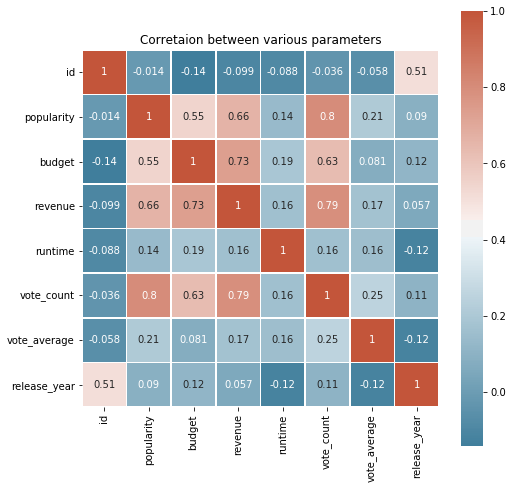

In [17]:
# What is the correlation between various attributes of the movie database 
#What are the various factors that have correlation with popularity
corr = df_clean.corr()
f,ax = plt.subplots(figsize=(8,8))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, cmap = cmap, square = True, linewidths = 0.5,annot = True )
ax.set_title("Corretaion between various parameters")

### All of the below seems to have some relation/dependecies on each other 

### Vote_count and Popularity, budget and popularity,budget and revenue,revenue popularity,revenue vote_count


### We can see more closely what all attributes have correlation with popularity and how


Text(0,0.5,'Popularity')

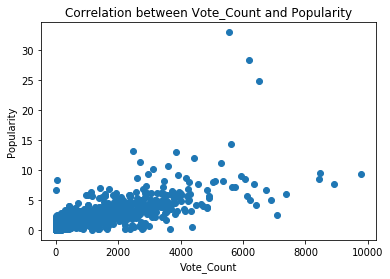

In [18]:
plt.scatter(df_clean.vote_count, df_clean.popularity)
plt.title("Correlation between Vote_Count and Popularity")
plt.xlabel("Vote_Count")
plt.ylabel("Popularity")


### There is strong positive correlation between Popularity and Vote_Count which is kind of expected also

Text(0,0.5,'Popularity')

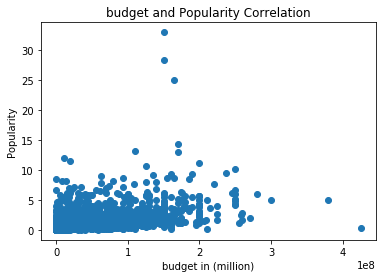

In [19]:
plt.scatter(df_clean.budget, df_clean.popularity)
plt.title("budget and Popularity Correlation")
plt.xlabel("budget in (million)")
plt.ylabel("Popularity")


### There is strong correlation between Popularity and Budget which means that the movies with higher budget movies attracts more people

Text(0,0.5,'Popularity')

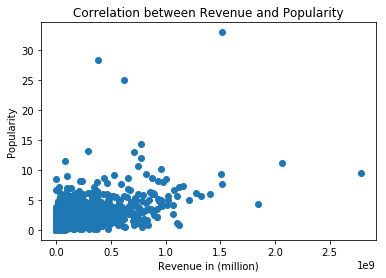

In [20]:
plt.scatter(df_clean.revenue, df_clean.popularity)
plt.title("Correlation between Revenue and Popularity")
plt.xlabel("Revenue in (million)")
plt.ylabel("Popularity")


### There is strong correlation between Popularity and Revenue which means that the movies which are more popular tends to have higher revenue

## Investigating Question 2 :


### Analyze the Budget and Revenue earned by the movie business over the years 

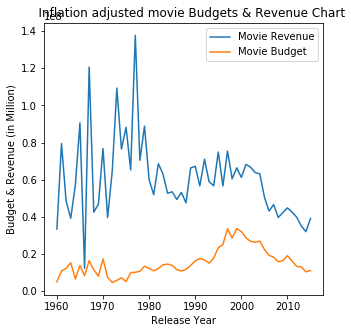

In [21]:
tmdb_df.groupby('release_year').revenue_adj.mean().plot(label='Movie Revenue', figsize = (5,5));
tmdb_df.groupby('release_year').budget_adj.mean().plot(label='Movie Budget',figsize = (5,5));

plt.title("    Inflation adjusted movie Budgets & Revenue Chart")
plt.xlabel("Release Year")
plt.ylabel("Budget & Revenue (in Million)")

plt.legend()

### In General movie business is always profitable i.e the margin of profit is always much higher
### From 1970's to 1980's were the best Years to produce the movie as the revenue margin was very high as compared to other Years
### From From 1980's to 2000 Movie budget was increasing constantly though the revenue generated was not so high 
### From 2000 to 2010 there was a decline in Movie Budget and so as in Revenue 

## Investigating Question 3 :
### Which Years have released the Maximum movies and what are the Top5 years that have maximum release

In [22]:
# Which Years have released the Maximum movies

# Top5 years that have maximum release  

df_count = df_clean.groupby('release_year').count()

df_top5 = df_count.sort_values(by=['id']).tail(5)

df_top5


,id,popularity,budget,revenue,homepage,director,runtime,release_date,vote_count,vote_average,Primary_Cast,Primary_genres,release_month
release_year,,,,,,,,,,,,,
2011,540,540,540,540,319,539,540,540,540,540,532,540,540
2012,588,588,588,588,251,584,588,588,588,588,580,584,588
2015,629,629,629,629,264,626,629,629,629,629,621,627,629
2013,659,659,659,659,225,655,659,659,659,659,656,656,659
2014,700,700,700,700,244,695,700,700,700,700,688,699,700


Text(0,0.5,'No. Of Movies Released')

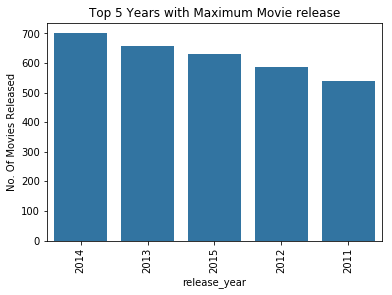

In [23]:
# Represent the Years Top 5 having maximum releases in a bar chart
base_color = sb.color_palette()[0]
plt.xticks(rotation=90)

freq = df_clean['release_year'].value_counts()
gen_order = freq.iloc[:5].index
sb.countplot(data=df_clean, x='release_year', color=base_color, order = gen_order);
plt.title ("Top 5 Years with Maximum Movie release")
plt.ylabel("No. Of Movies Released")

### Top 5 Years where the maximum movies were released are :
  #### 1. 2014 
  #### 2. 2013
  #### 3. 2015
  #### 4. 2012
  #### 5. 2011

##  Investigating Question 4 : 
#### Are there any months where Movie release is high


Text(0,0.5,'No. Of Movies Released')

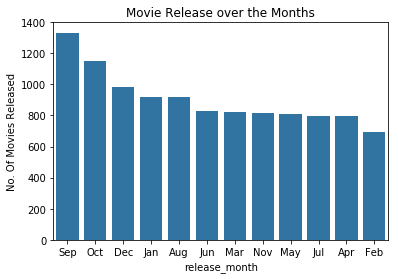

In [24]:
# Are there any months where Movie release is high

base_color = sb.color_palette()[0]
freq = df_clean['release_month'].value_counts()
gen_order = freq.index

sb.countplot(data=df_clean, x=df_clean['release_month'],color=base_color, order = gen_order);
plt.title ("Movie Release over the Months")
plt.ylabel("No. Of Movies Released")



### So the Result shows that comparatively September, October, December have high movie releases than rest of the year.This might be due to the holiday season

## Investigating Question : 5
### What are the genres for which Maximum movies are released

In [25]:
# Create a separate dataframe for digging into generes and their popularity

df_detail_genre = df_clean[['id','Primary_genres', 'Primary_Cast', 'vote_average', 'release_year']]
df_detail_genre.head(5)


,id,Primary_genres,Primary_Cast,vote_average,release_year
0,135397,Action,Chris Pratt,6.5,2015
1,76341,Action,Tom Hardy,7.1,2015
2,262500,Adventure,Shailene Woodley,6.3,2015
3,140607,Action,Harrison Ford,7.5,2015
4,168259,Action,Vin Diesel,7.3,2015


In [26]:
# What are the genres for which Maximum movies are released

genres_count = df_detail_genre.groupby('Primary_genres').count()
genres_top5 = genres_count.sort_values(by=['id']).tail(5)

genres_top5['id'].sort_values(ascending = False)


Primary_genres
Drama        2453
Comedy       2319
Action       1590
Horror        915
Adventure     586
Name: id, dtype: int64

Text(0,0.5,'No. Of Movies Released')

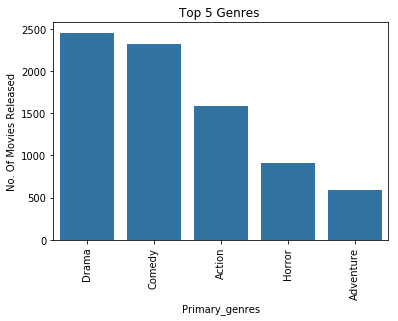

In [27]:
base_color = sb.color_palette()[0]
plt.xticks(rotation=90)

freq = df_clean['Primary_genres'].value_counts()
gen_order = freq.iloc[:5].index
sb.countplot(data=df_clean, x='Primary_genres', color=base_color, order = gen_order);
plt.title ("Top 5 Genres ")
plt.ylabel("No. Of Movies Released")

### List of Top 5 Genres are Drama(highest), Comedy, Action, Horror, Adventure

## Investigating Question 6 :
### What are the years where the most popular genres are produced

In [28]:
# Checking further more details about the Drama Genre
drama_df = df_detail_genre.loc[df_detail_genre['Primary_genres'] == "Drama"]
drama_df.describe()

,id,vote_average,release_year
count,2453.000000,2453.000000,2453.000000
mean,64535.483897,6.200448,2001.836934
std,89835.729335,0.813761,12.437032
min,14.000000,2.900000,1960.000000
25%,10435.000000,5.700000,1996.000000
50%,21494.000000,6.300000,2006.000000
75%,74997.000000,6.800000,2011.000000
max,395560.000000,8.800000,2015.000000


In [29]:
count_YearD = drama_df.groupby("release_year").count()
Years_MaxD = count_YearD.sort_values(by=['id']).tail(5)
Years_MaxD['id'].sort_values(ascending = False)


release_year
2014    148
2012    148
2015    144
2013    134
2008    132
Name: id, dtype: int64

### Years where max number of Drama Movies were produced are :2008, 2012-2015

In [30]:
# Checking further more details about the Comedy Genre 

In [31]:
comedy_df = df_detail_genre.loc[df_detail_genre['Primary_genres'] == "Comedy"]
comedy_df.describe()

,id,vote_average,release_year
count,2319.000000,2319.000000,2319.000000
mean,50938.212160,5.882924,2000.756792
std,77120.252693,0.842514,12.036879
min,5.000000,2.100000,1960.000000
25%,10589.500000,5.300000,1994.000000
50%,17202.000000,5.900000,2004.000000
75%,45586.000000,6.500000,2010.000000
max,371442.000000,8.500000,2015.000000


In [32]:
count_YearC = comedy_df.groupby("release_year").count()
Years_MaxC = count_YearC.sort_values(by=['id']).tail(5)
Years_MaxC['id'].sort_values(ascending = False)


release_year
2009    129
2013    115
2008    115
2012    110
2007    104
Name: id, dtype: int64

### Years where max number of Comedy Movies were produced are :2007-2009, 2012, 2013

In [33]:
# Checking further more details about the Action Genre
action_df = df_detail_genre.loc[df_detail_genre['Primary_genres'] == "Action"]
action_df.describe()

,id,vote_average,release_year
count,1590.000000,1590.000000,1590.000000
mean,47471.288050,5.752327,1999.319497
std,74968.072672,0.950468,12.976905
min,6.000000,1.500000,1960.000000
25%,9885.500000,5.200000,1992.000000
50%,15278.500000,5.800000,2003.000000
75%,41369.750000,6.400000,2010.000000
max,417859.000000,8.000000,2015.000000


In [34]:
count_YearA = action_df.groupby("release_year").count()
Years_MaxA = count_YearA.sort_values(by=['id']).tail(5)
Years_MaxA['id'].sort_values(ascending = False)


release_year
2013    87
2009    71
2012    67
2011    67
2010    66
Name: id, dtype: int64

### Years where max number of Action Movies were produced are :2009-2013

In [35]:
# Checking further more details about the Horror Genre
horror_df = df_detail_genre.loc[df_detail_genre['Primary_genres'] == "Horror"]
horror_df.describe()

,id,vote_average,release_year
count,915.000000,915.000000,915.000000
mean,74955.523497,5.318798,2000.909290
std,94634.508190,0.965554,14.194702
min,17.000000,1.500000,1960.000000
25%,11679.000000,4.700000,1990.000000
50%,28355.000000,5.400000,2007.000000
75%,93127.000000,6.000000,2012.000000
max,368256.000000,8.100000,2015.000000


In [36]:
count_YearH = horror_df.groupby("release_year").count()
Years_MaxH = count_YearH.sort_values(by=['id']).tail(5)
Years_MaxH['id'].sort_values(ascending = False)


release_year
2013    67
2012    65
2015    63
2014    58
2011    55
Name: id, dtype: int64

### Years where max number of Horror Movies were produced are : 2011-2015

In [37]:
# Checking further more details about the Adventure Genre
adv_df = df_detail_genre.loc[df_detail_genre['Primary_genres'] == "Adventure"]
adv_df.describe()

,id,vote_average,release_year
count,586.000000,586.000000,586.000000
mean,45114.796928,6.052048,1998.546075
std,76729.337005,0.916219,13.628355
min,11.000000,2.600000,1960.000000
25%,8845.500000,5.500000,1990.000000
50%,13684.500000,6.100000,2003.000000
75%,36668.750000,6.700000,2009.000000
max,409696.000000,8.500000,2015.000000


In [38]:
count_YearAdv = adv_df.groupby("release_year").count()
Years_MaxAdv = count_YearAdv.sort_values(by=['id']).tail(5)
Years_MaxAdv['id'].sort_values(ascending = False)


release_year
2011    31
2008    30
2014    29
2009    27
2007    24
Name: id, dtype: int64

### Years where Max Adventure movie was produced is 2007-2009, 2011, 2014

## Investigating Question 7
### Does older movies have online precense (homepage)

In [39]:
# Check Online Presence 
#After checking the database It was observed that many movies do not homepage entry available so My hypothesis is that the older movies might not 
# have online precense or homepage available so taking a dataset which contains attributes required to test this hypothesis

df_Online_P = df_clean[['id', 'homepage', 'release_year']]
df_Online_P.head(5)

,id,homepage,release_year
0,135397,http://www.jurassicworld.com/,2015
1,76341,http://www.madmaxmovie.com/,2015
2,262500,http://www.thedivergentseries.movie/#insurgent,2015
3,140607,http://www.starwars.com/films/star-wars-episod...,2015
4,168259,http://www.furious7.com/,2015


In [40]:
# Check wheather Old movies have less homepage available

HomePage_df = df_Online_P.loc[df_Online_P['homepage'].isnull()]
List_HomePage = HomePage_df.groupby("release_year").count()
Max_homepage = List_HomePage.sort_values(by=['id']).tail(5)
Max_homepage = pd.DataFrame(Max_homepage)
print (Max_homepage)

# Thus 2006 has 287 entries where the homepage is null and so on for other years displayed

               id  homepage
release_year               
2006          287         0
2012          337         0
2015          365         0
2013          434         0
2014          456         0


In [41]:
Min_homepage = List_HomePage.sort_values(by=['id']).head(5)
Min_homepage = pd.DataFrame(Min_homepage)
print (Min_homepage)
# Thus 1961 has 30 entries where the homepage is null and so on for other years displayed

              id  homepage
release_year              
1961          30         0
1969          30         0
1962          31         0
1960          32         0
1963          33         0


In [42]:
# Merging two dataframes with min and max availablity of homepage
merge_df = Min_homepage.append(Max_homepage)
merge_df


,id,homepage
release_year,,
1961,30,0
1969,30,0
1962,31,0
1960,32,0
1963,33,0
2006,287,0
2012,337,0
2015,365,0
2013,434,0


In [43]:
# Digging it deeper to also check how many movie released for each above mentioned years Vs How many had Homepage

dict = {'release_year':[1961, 1969, 1962, 1960, 1963, 2006, 2012, 2015, 2013, 2014],
        'null_homepage': [30, 30, 31, 32, 33, 287,337,365, 434, 456]}
   
Total_release = []
j=0
for i in dict['release_year']:
   Movies = pd.DataFrame(df_clean.loc[df_clean['release_year'] == i])
   Total_release.append (Movies['id'].count())
   j=j+1

df_new = pd.DataFrame(dict)
df_new.insert(loc=2, column='Total_Release', value=Total_release)    

df_new


,release_year,null_homepage,Total_Release
0,1961,30,31
1,1969,30,31
2,1962,31,32
3,1960,32,32
4,1963,33,34
5,2006,287,408
6,2012,337,588
7,2015,365,629
8,2013,434,659
9,2014,456,700


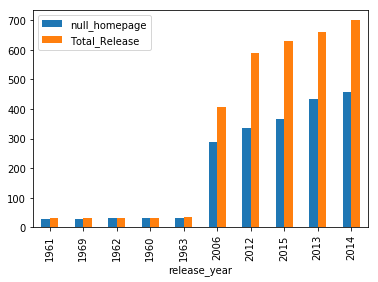

In [44]:
df_new.plot(x="release_year", y=["null_homepage", "Total_Release"], kind="bar");


### Thus Our Hypothesis seems to be correct that older years movies have less no. of homepage available
### After seeing this data it looks like that older movies have much lesser homepage available when compared with the total release
### On analyzing this Bar Chart looks like our hypothesis is correct

## Investigating Question 8
### Check the Vote Average distribution Check what are the most common ratings

In [45]:
# Check the Vote Average distribution 
# Check what are the most common ratings

Text(0,0.5,'Distribution')

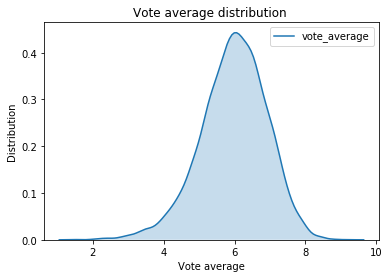

In [46]:

fig, ax = plt.subplots()
ax =sb.kdeplot(tmdb_df.vote_average, shade=True);
ax.set_title('Vote average distribution ')
ax.set_xlabel('Vote average')
ax.set_ylabel('Distribution')


### Thus maximum rating lies between the range 4 to 8
### Maximum vote_avg is 6

# Conclusion 

### What is the correlation between various attributes of the movie database and What are the various factors that have correlation with popularity
#### Vote_count and Popularity, budget and popularity,budget and revenue,revenue popularity,revenue vote_count have strong positive relation


### Analyze the Budget and Revenue earned by the movie business over the years 
#### In General movie business is always profitable i.e the margin of profit is always much higher
#### From 1970's to 1980's were the best Years to produce the movie as the revenue margin was very high as compared to other Years
#### From From 1980's to 2000 Movie budget was increasing constantly though the revenue generated was not so high
#### From 2000 to 2010 there was a decline in Movie Budget and so as in Revenue


### Which Years have released the Maximum movies and what are the Top5 years that have maximum release
#### Top 5 Years where the maximum movies were released are : 1. 2014 (Highest) 2. 2013 3. 2015 4. 2012 5. 2011


### Are there any months where Movie release is high
#### Investigation shows September(Highest), October, December have high movie releases than rest of the year.This might be due to the holiday season


### What are the genres for which Maximum movies are released
#### List of Top 5 Genres are Drama(highest), Comedy, Action, Horror, Adventure

### What are the years where the most popular genres are produced
#### Years where Max Adventure movie was produced is 2007-2009, 2011, 2014
#### Years where max number of Horror Movies were produced are : 2011-2015
#### Years where max number of Action Movies were produced are :2009-2013
#### Years where max number of Comedy Movies were produced are :2007-2009, 2012, 2013
#### Years where max number of Drama Movies were produced are :2008, 2012-2015

### Does older movies have online precense (homepage)
#### Yes When compared to the total movie released and number of homepage available its concluded that the older movies have lesser online presence

### Check the Vote Average distribution Check what are the most common ratings
#### Maximum rating lies between the range 4 to 8 and Maximum vote_avg is 6

# Limitations :

#### 1. Budget & Revenue also have 0 values: Looks like data unavailability.

#### 2. Currency for budget & revenue: All of the budget & revenue assumed to be in dollars to have a comparative analysis but impact of other currency values counted as dollars is neglected for now.

#### 3. Primary genre and Cast : assumed that the first cast/genre is the primary cast/genre

#### 4. Popularity & vote average differnce: Have used vote average as the a replacement of popularity variable as that seems to fit a scale.

#### 5. Dropped few columns for investigation assuming it wont affect our analysis


In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0